# Section 4 - Empirical analysis

## 4.1 - Preliminary results

In [15]:
import pandas as pd
import numpy as np
from dadapy import Data
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.gaussian_process.kernels as k
from datetime import datetime
from matplotlib.dates import date2num
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.interpolate import interp1d
plt.rcParams['text.usetex'] = True

In [16]:
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')
df_ = df.drop(df.columns[[0,1]], axis=1)
df_.describe().T[['mean', 'std', 'min', '25%', '50%', '75%','max']].to_excel('DescriptiveStatistics.xlsx')

In [17]:
df2 = pd.read_excel('../Data/Dataset_eua_Macro_V1.xlsx')
df2 = df2.drop(df2.columns[[0,1,2, 3, 5, 7, 8, 9, 10, 11]], axis=1)
df2.describe().T[['mean', 'std', 'min', '25%', '50%', '75%','max']].to_excel('DescriptiveStatisticsMacro.xlsx')

In [18]:
df3 = pd.concat([df_.describe().T[['mean', 'std', 'min', '25%', '50%', '75%','max']], df2.describe().T[['mean', 'std', 'min', '25%', '50%', '75%','max']]], axis=1)
df3.to_excel('../Data/DescriptiveStatisticsAll.xlsx')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
from datetime import datetime

In [20]:
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [21]:
df_ = df.drop(df.columns[[0,1]], axis=1)
target = df['eua_last']
target_ = target.values
date = df['Date']

In [22]:
X_labels = np.array(['EUA','GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elec. ind.', '10 Year Bond y.', '3 Month Bond y.'])
df_.columns = X_labels

In [23]:
X_3 = df_.iloc[0:1782,:]
correlations_3 = X_3.corrwith(df_["EUA"])
correlations_3 = correlations_3.sort_values(ascending=False)
correlations_3 = correlations_3[1:]

In [24]:
NUM_COLORS1 = 31
cm = plt.get_cmap('Wistia')
colors1 = [cm(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

color1_1 = colors1_test[0]
color1_2 = colors1_test[1]
color1_3 = colors1_test[2]
color1_4 = colors1_test[3]
color1_5 = colors1_test[4]

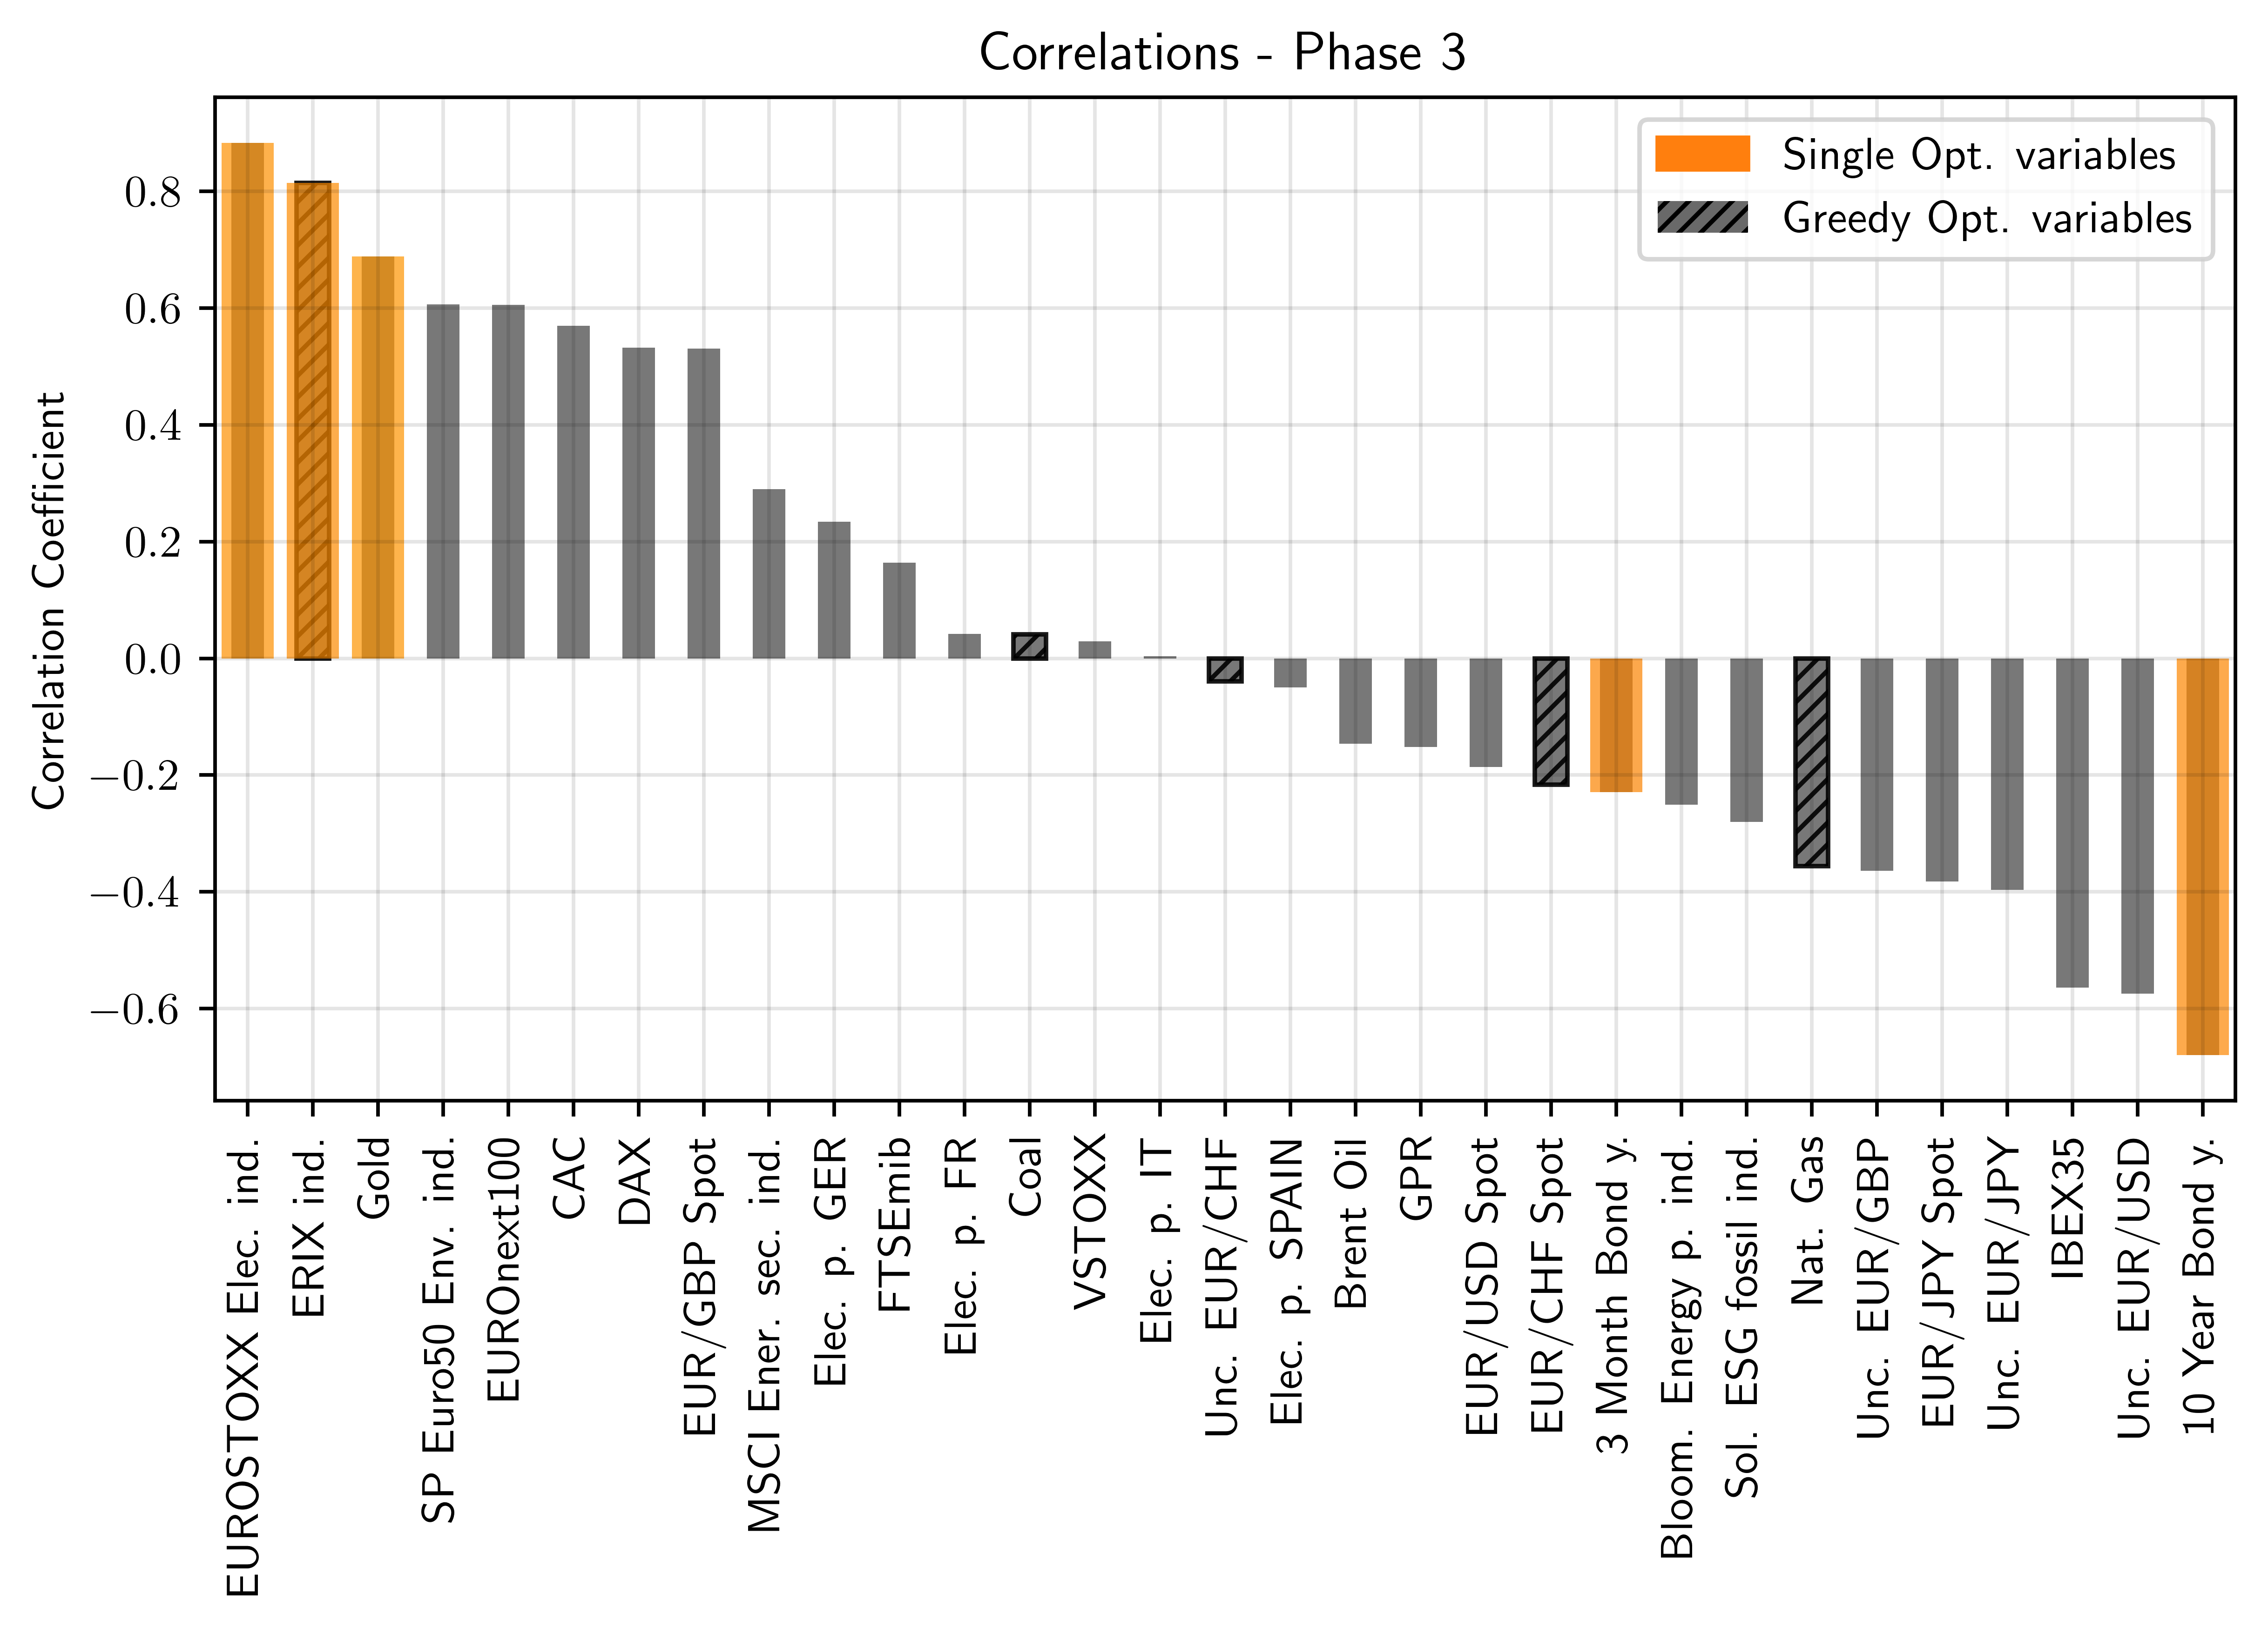

In [25]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
correlations_3.plot(kind='bar', color='dimgrey' , alpha=0.9, figsize=(8, 4))
plt.bar(1, correlations_3[1], color=color1_3, alpha=0.7)
plt.bar(0, correlations_3[0], color=color1_4, alpha=0.7)
plt.bar(30, correlations_3[30], color=color1_2, alpha=0.7)
plt.bar(21, correlations_3[21], color=color1_1, alpha=0.7)
plt.bar(2, correlations_3[2], color=color1_5, alpha=0.7)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Correlations - Phase 3')
ax = plt.gca()
ax.patches[1].set_hatch('/////')
ax.patches[12].set_hatch('/////')
ax.patches[24].set_hatch('/////')
ax.patches[15].set_hatch('/////')
ax.patches[20].set_hatch('/////')
ax.patches[1].set_edgecolor('k')
ax.patches[12].set_edgecolor('k')
ax.patches[24].set_edgecolor('k')
ax.patches[15].set_edgecolor('k')
ax.patches[20].set_edgecolor('k')
orange_patch = mpatches.Patch(color='tab:orange', label='Single Opt. variables')
dotted_patch = mpatches.Patch(facecolor='dimgrey', hatch='/////', label='Greedy Opt. variables')
plt.legend(handles=[orange_patch, dotted_patch])
plt.show()
fig.savefig('../Figures/Fig4_1_Correlations_Phase3.png', dpi=700)

In [26]:
X_4 = df_.iloc[1782:,]
correlations_4 = X_4.corrwith(df_["EUA"])
correlations_4 = correlations_4.sort_values(ascending=False)
correlations_4 = correlations_4[1:]

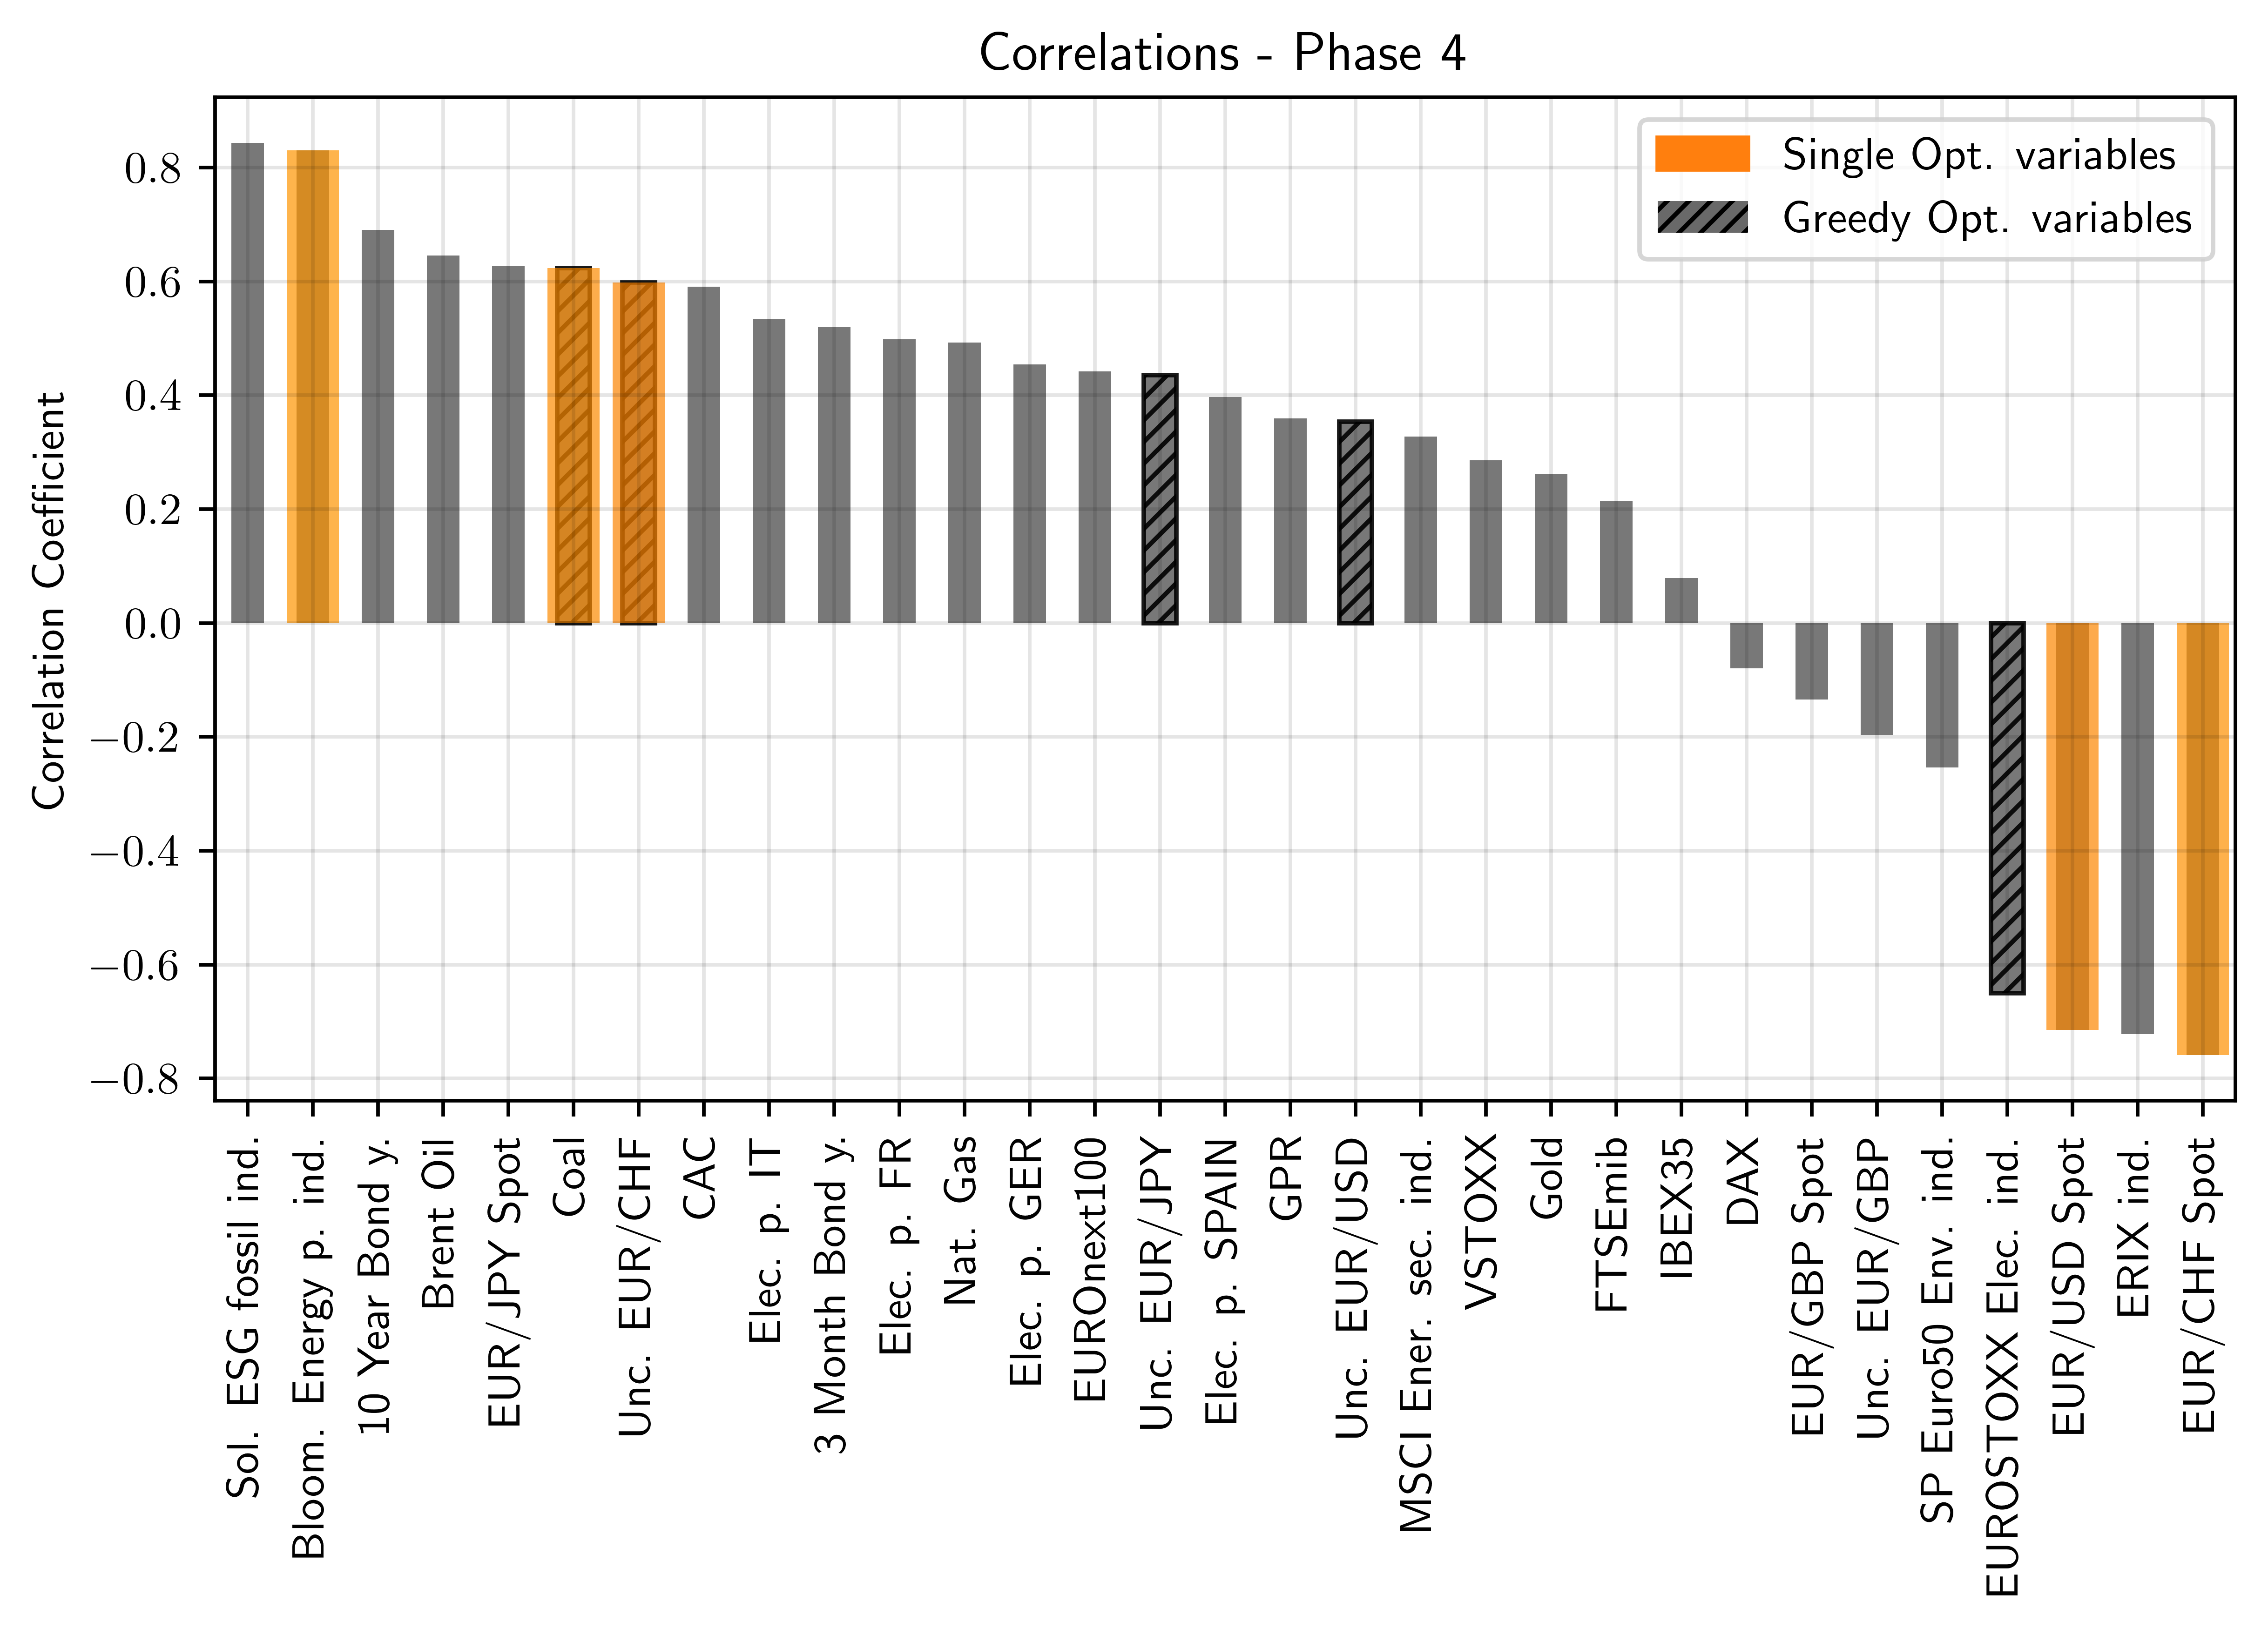

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(4,4), dpi = 700)
correlations_4.plot(kind='bar', color='dimgrey' , alpha=0.9, figsize=(8, 4))
plt.bar(6, correlations_4[6], color=color1_1, alpha=0.7)
plt.bar(28, correlations_4[28], color=color1_2, alpha=0.7)
plt.bar(5, correlations_4[5], color=color1_3, alpha=0.7)
plt.bar(30, correlations_4[30], color=color1_4, alpha=0.7)
plt.bar(1, correlations_4[1], color=color1_5, alpha=0.7)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Correlations - Phase 4')
ax = plt.gca()
ax.patches[6].set_hatch('/////')
ax.patches[17].set_hatch('/////')
ax.patches[5].set_hatch('/////')
ax.patches[14].set_hatch('/////')
ax.patches[27].set_hatch('/////')
ax.patches[6].set_edgecolor('k')
ax.patches[17].set_edgecolor('k')
ax.patches[5].set_edgecolor('k')
ax.patches[14].set_edgecolor('k')
ax.patches[27].set_edgecolor('k')
import matplotlib.patches as mpatches
orange_patch = mpatches.Patch(color='tab:orange', label='Single Opt. variables')
dotted_patch = mpatches.Patch(facecolor='dimgrey', hatch='/////', label='Greedy Opt. variables')
plt.legend(handles=[orange_patch, dotted_patch])
plt.show()
plt.savefig('../Figures/Fig4_2_Correlations_Phase4.png', dpi=700)

Figure 4: Correlation analysis. In this plot we present the correlations among the raw daily data towards EUA. The most informative single variables (Fig. 5) are highlighted in shades of orange. The dashed bars refers to the first 5 most informative variables obtain through a greedy selection algorithm (Fig. 6), for Phase 3 and Phase 4.

***

## 4.2 - Information Imbalance analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler
from dadapy import DataSets as ds
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2, _get_average_imbalance_from_d1_to_d2
from scipy.spatial.distance import pdist, squareform
plt.rcParams['text.usetex'] = True

In [29]:
NUM_COLORS1 = 31
cm_1 = plt.get_cmap('Wistia')
colors1 = [cm_1(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

NUM_COLORS2 = 10
cm_2 = plt.get_cmap('Set3')
colors2 = [cm_2(1.*i/NUM_COLORS2) for i in range(NUM_COLORS2)]

In [30]:
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [31]:
labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.'])

In [32]:
y = df['eua_last']
y = y.values
y = y.reshape(-1,1)
X = df.iloc[:,3:]
X = X.values
scaler = StandardScaler()
y = scaler.fit_transform(y)
X = scaler.fit_transform(X)

In [33]:
X_3 = X[:1782, :]
y_3 = y[:1782, :]

In [34]:
d_y_3 = Data(y_3, maxk=y_3.shape[0]-1)
d_y_3.compute_distances()

d_X_3 = Data(X_3, maxk=X_3.shape[0]-1)
d_X_3.compute_distances()

d_y3_dist_matrix = squareform(pdist(y_3, 'euclidean'))
# d_X3_dist_matrix = squareform(pdist(X_3, 'euclidean'))

imbalance_old = _get_imbalance_from_d1_to_d2(d_X_3, d_y_3)
imbalance_new =_get_imbalance_from_d1_to_d2(d_y_3, d_X_3)
imbalance_average_X_to_y = _get_average_imbalance_from_d1_to_d2(d_X_3, d_y3_dist_matrix)
# imbalance_average_y_to_X = _get_average_imbalance_from_d1_to_d2(d_y_3, d_X3_dist_matrix)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


In [36]:
inf_imb_X_to_y = []
inf_imb_X_to_y_average = []

for i in range(X_3.shape[1]):
    print(i)
    d_3_i = Data(X_3[:, [i]], maxk=X_3.shape[0]-1)
    d_3_i.compute_distances()
    inf_imb_X_to_y.append(_get_imbalance_from_d1_to_d2(d_3_i, d_y_3))
    inf_imb_X_to_y_average.append(_get_average_imbalance_from_d1_to_d2(d_3_i, d_y3_dist_matrix))

0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


9


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


13


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


16


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


17


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


18


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


19


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


21


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


22


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


23


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


26


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


27


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


28


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


29


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


In [37]:
inf_imb_y_to_X = []
inf_imb_y_to_X_average = []

for i in range(X_3.shape[1]):
    print(i)
    X_3_i = X_3[:, [i]]
    d_x_3_i = squareform(pdist(X_3_i, 'euclidean'))
    d_3 = Data(y_3, maxk=y_3.shape[0]-1)
    d_3.compute_distances()
    inf_imb_y_to_X.append(_get_imbalance_from_d1_to_d2(d_3, d_X_3))
    inf_imb_y_to_X_average.append(_get_average_imbalance_from_d1_to_d2(d_3, d_x_3_i))

0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


9


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


13


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


16


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


17


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


18


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


19


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


21


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


22


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


23


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


26


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


27


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


28


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


29


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


In [38]:
sort_idx = np.argsort(inf_imb_X_to_y_average)
inf_imb_X_to_y_average = np.array(inf_imb_X_to_y_average)[sort_idx]
inf_imb_X_to_y = np.array(inf_imb_X_to_y)[sort_idx]
labels = labels[sort_idx]
inf_imb_y_to_X_average = np.array(inf_imb_y_to_X_average)[sort_idx]
inf_imb_y_to_X = np.array(inf_imb_y_to_X)[sort_idx]


In [39]:
enumeration = np.arange(1, len(inf_imb_X_to_y_average)+1)
single_imbs = np.zeros((31,2))
single_imbs[:,0] = inf_imb_X_to_y_average
single_imbs[:,1] = inf_imb_y_to_X_average

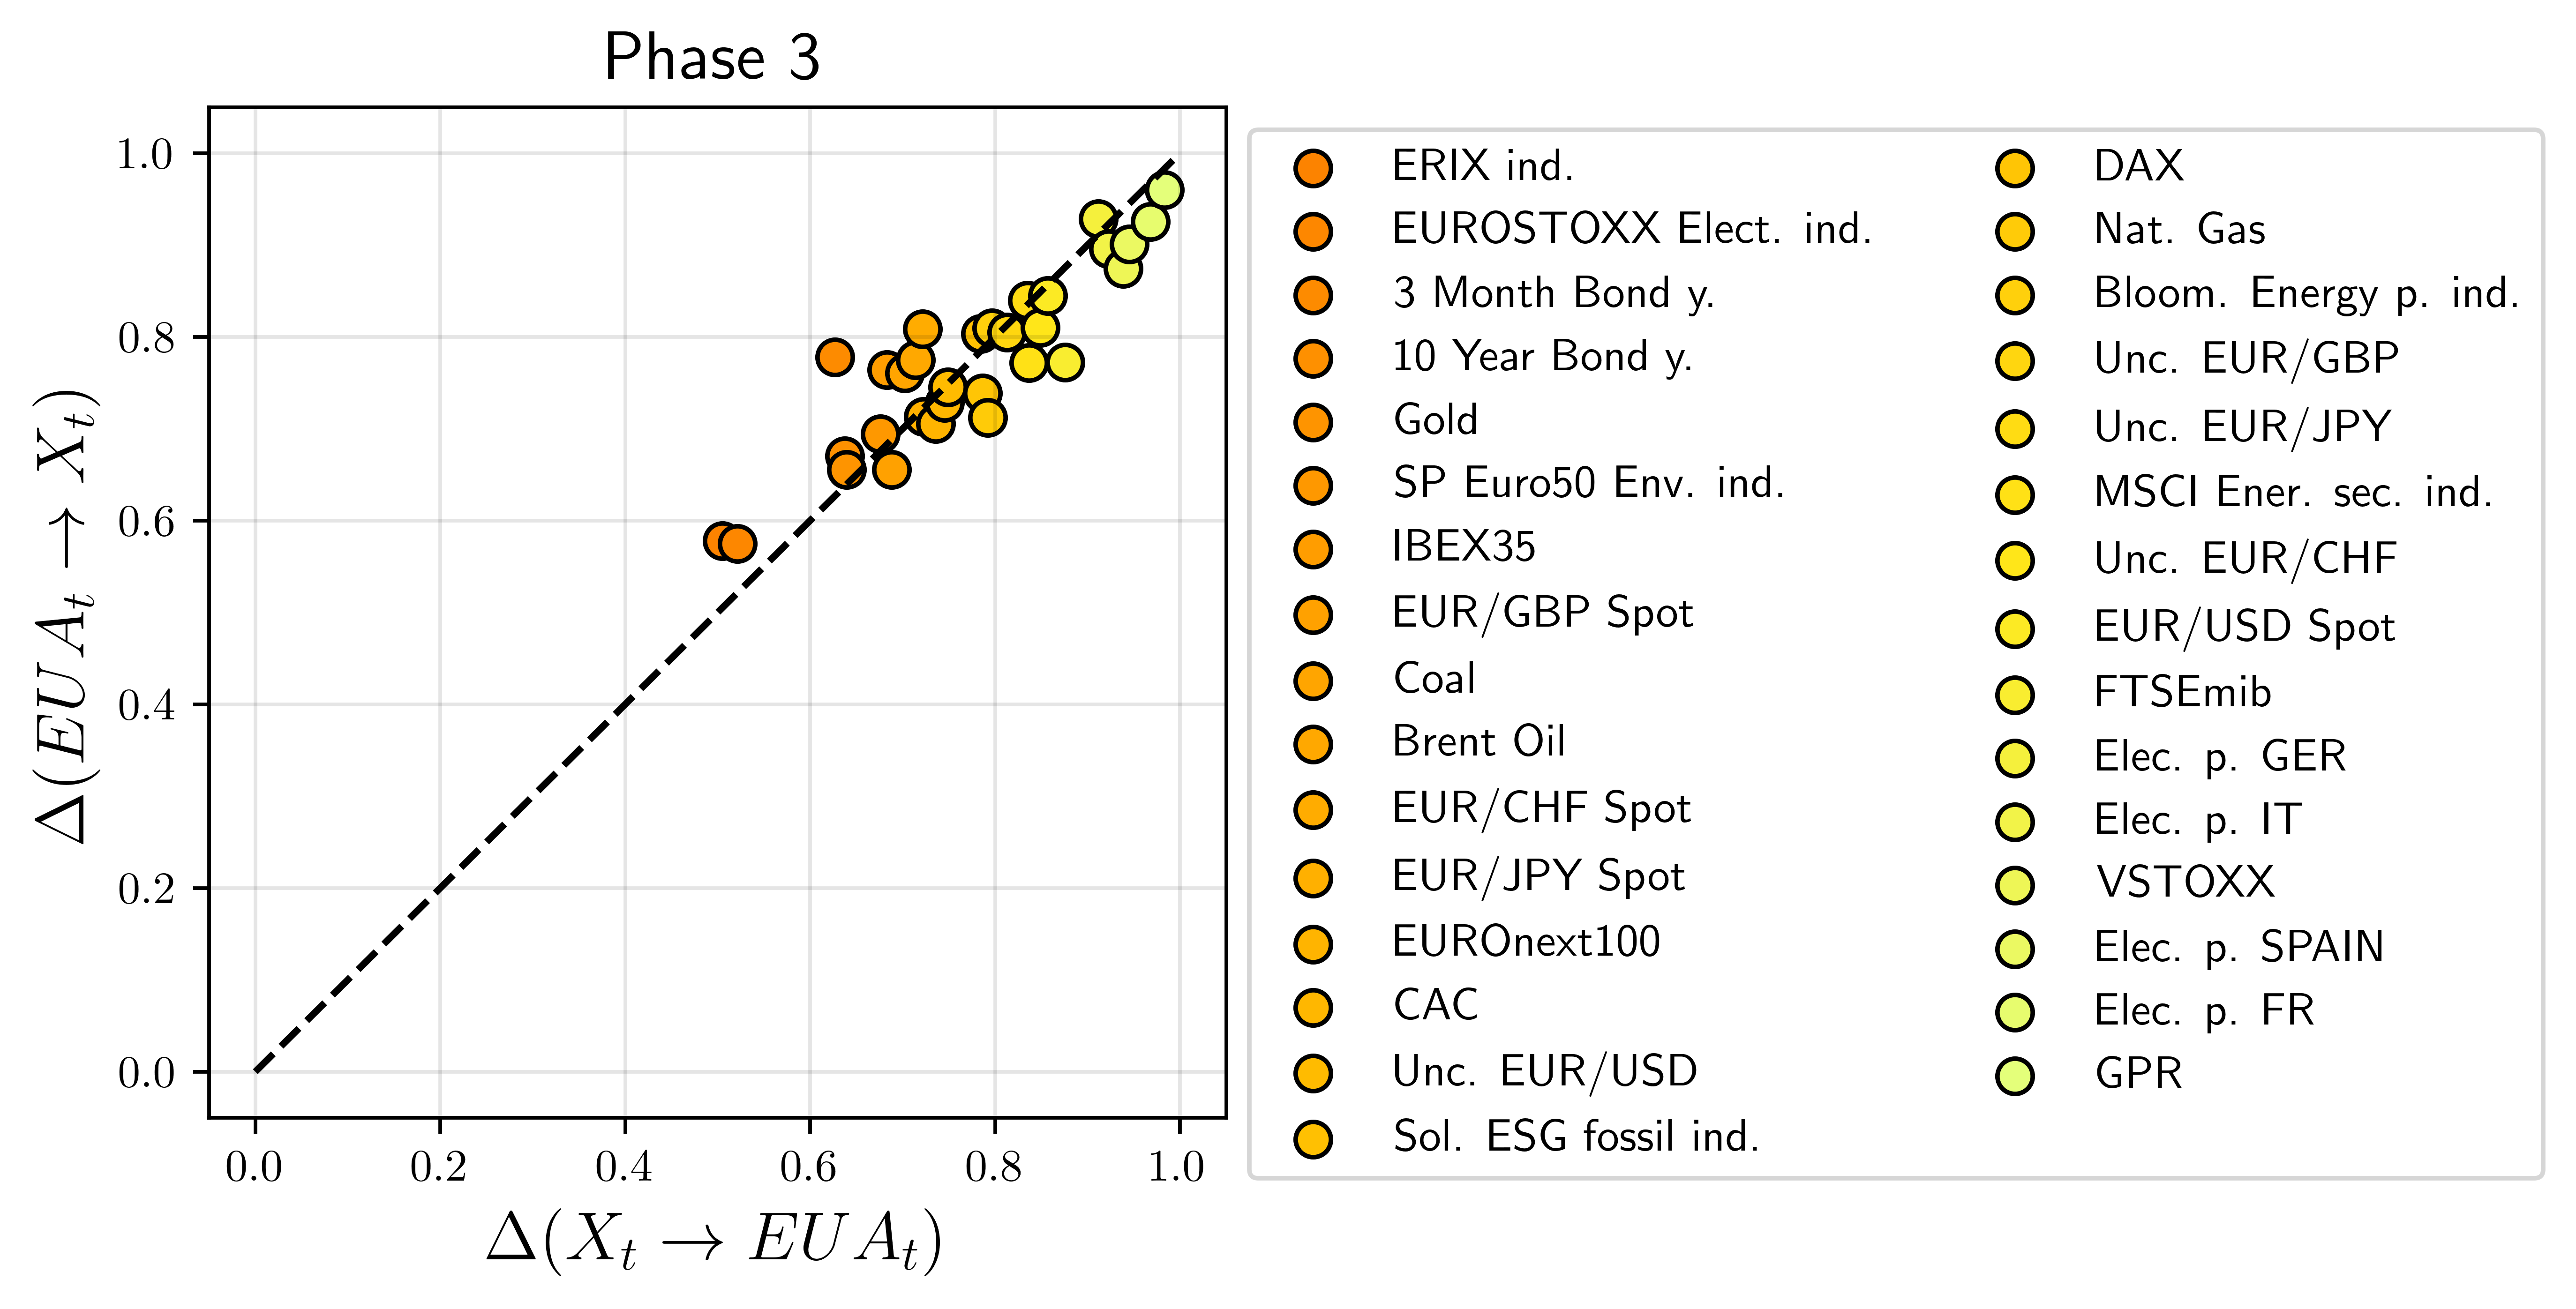

In [40]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
ax.set_facecolor("white")
for i, imbs in enumerate(single_imbs):
    plt.scatter(imbs[0], imbs[1], color = colors1_test[i], s=60, edgecolor ='k', label = labels[i])
plt.plot([0, 1], 'k--')
plt.legend(ncol = 2, bbox_to_anchor=(1.0, 1.))
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Phase 3', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)
plt.show()
fig.savefig('../Figures/Fig5_1_Imbalance_Phase3.png', dpi=700)